In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
file_less = 'data/world_bank_projects_less.json'
file_full = 'data/world_bank_projects.json'
df_less = pd.read_json(file_less)
df_full = pd.read_json(file_full)

In [36]:
df_1 = df_full[['countrycode']]
df_2 = df_full[['countryshortname']]
df_1.head()

,countrycode
0,ET
1,TN
2,TV
3,RY
4,LS


In [37]:
def change(row):
    og = row['countrycode']
    country = df_1['countrycode']
    values = country.value_counts()
    for i, v in values.iteritems():
        if og == i:
            return v

In [38]:
df_1['total'] = df_1.apply(change, axis=1)

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_1.head()

,countrycode,total
0,ET,4
1,TN,4
2,TV,1
3,RY,13
4,LS,3


In [40]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
countrycode    500 non-null object
total          500 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.7+ KB


In [41]:
df_1 = df_1.groupby(['countrycode']).count()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1W to ZW
Data columns (total 1 columns):
total    118 non-null int64
dtypes: int64(1)
memory usage: 1.8+ KB


In [42]:
df_1.head()

,total
countrycode,
1W,2
3A,11
4E,1
4P,4
5M,4


In [43]:
df_1 = df_1.sort_values('total',ascending=False)

In [44]:
df_1.head(10)

,total
countrycode,
ID,19
CN,19
VN,17
IN,16
RY,13
MA,12
BD,12
NP,12
3A,11


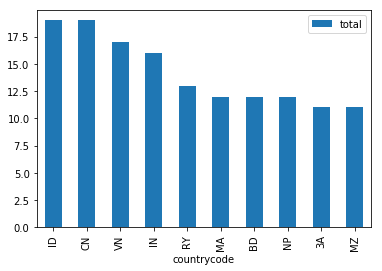

In [45]:
df_1.head(10).plot(kind='bar')

-----

In [75]:
def change(row):
    og = row['countryshortname']
    country = df_full['countryshortname']
    values = country.value_counts()
    for i, v in values.iteritems():
        if og == i:
            return v

In [47]:
df_2.columns

Index(['countryshortname'], dtype='object')

In [48]:
df_2.head()

,countryshortname
0,Ethiopia
1,Tunisia
2,Tuvalu
3,"Yemen, Republic of"
4,Lesotho


In [49]:
df_2['total'] = df_2.apply(change, axis=1)


/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_2.head()

,countryshortname,total
0,Ethiopia,4
1,Tunisia,4
2,Tuvalu,1
3,"Yemen, Republic of",13
4,Lesotho,3


In [51]:
df_2 = df_2.groupby('countryshortname').count()
df_2.head()

,total
countryshortname,
Afghanistan,6
Africa,11
Albania,4
Angola,1
Antigua and Barbuda,1


In [52]:
df_2 = df_2.sort_values('total')
df_2.head()

,total
countryshortname,
Zimbabwe,1
Kiribati,1
Namibia,1
Panama,1
Poland,1


In [53]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, Zimbabwe to Indonesia
Data columns (total 1 columns):
total    118 non-null int64
dtypes: int64(1)
memory usage: 1.8+ KB


In [56]:
df_2 = df_2.sort_values('total',ascending=False)

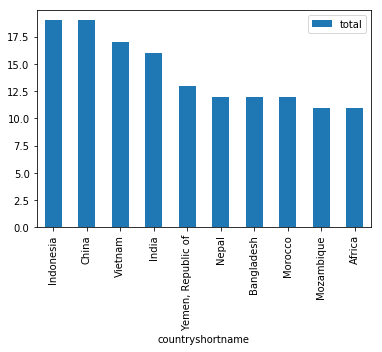

In [57]:
df_2.head(10).plot(kind='bar')

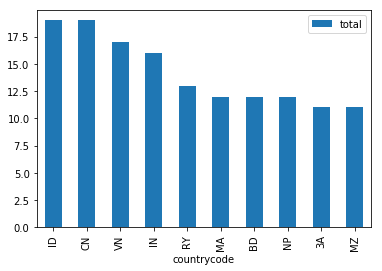

In [58]:
df_1.head(10).plot(kind='bar')

In [62]:
df_1.head(10)

,total
countrycode,
ID,19
CN,19
VN,17
IN,16
RY,13
MA,12
BD,12
NP,12
3A,11


In [61]:
df_2.head(10)

,total
countryshortname,
Indonesia,19
China,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11


In [63]:
df_full.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [80]:
df_3 = df_full[['countrycode','countryshortname']]
df_3.head()

,countrycode,countryshortname
0,ET,Ethiopia
1,TN,Tunisia
2,TV,Tuvalu
3,RY,"Yemen, Republic of"
4,LS,Lesotho


In [81]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
countrycode         500 non-null object
countryshortname    500 non-null object
dtypes: object(2)
memory usage: 11.7+ KB


In [82]:
df_3['total'] = df_3.apply(change, axis=1)
df_3.head()

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,countrycode,countryshortname,total
0,ET,Ethiopia,4
1,TN,Tunisia,4
2,TV,Tuvalu,1
3,RY,"Yemen, Republic of",13
4,LS,Lesotho,3


In [83]:
df_3.groupby('countryshortname').count()

,countrycode,total
countryshortname,,
Afghanistan,6,6
Africa,11,11
Albania,4,4
Angola,1,1
Antigua and Barbuda,1,1
Argentina,2,2
Armenia,8,8
Azerbaijan,4,4
Bangladesh,12,12


In [84]:
df_full.groupby('countryshortname').count()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,docty,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
countryshortname,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6,6,6,6,6,5,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Africa,11,11,11,11,11,7,11,11,11,10,...,11,11,11,11,11,11,11,11,11,11
Albania,4,4,4,4,4,2,4,4,4,2,...,4,4,4,4,4,4,4,4,4,4
Angola,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Argentina,2,2,2,2,2,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Armenia,8,8,8,8,8,6,8,8,8,5,...,8,8,8,8,8,8,8,8,8,8
Azerbaijan,4,4,4,4,4,1,4,4,4,3,...,4,4,4,4,4,4,4,4,4,4
Bangladesh,12,12,12,12,12,10,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [121]:
df_4 = df_full[['countrycode','countryshortname']]
df_4

,countrycode,countryshortname
0,ET,Ethiopia
1,TN,Tunisia
2,TV,Tuvalu
3,RY,"Yemen, Republic of"
4,LS,Lesotho
5,KE,Kenya
6,IN,India
7,CN,China
8,IN,India
9,MA,Morocco


In [110]:
df_4['new'] = df_4[df_4.groupby('countrycode').count()]
df_4

ValueError: Must pass DataFrame with boolean values only

In [112]:
df_4.sort_values('countrycode',ascending=False)

,countrycode,countryshortname
89,ZW,Zimbabwe
141,ZR,"Congo, Democratic Republic of"
213,ZR,"Congo, Democratic Republic of"
203,ZR,"Congo, Democratic Republic of"
205,ZR,"Congo, Democratic Republic of"
140,ZR,"Congo, Democratic Republic of"
365,ZR,"Congo, Democratic Republic of"
480,ZM,Zambia
204,ZM,Zambia
169,ZM,Zambia


In [122]:
df_4['total'] = df_4.groupby('countrycode').transform('count')

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
countrycode         500 non-null object
countryshortname    500 non-null object
total               500 non-null int64
dtypes: int64(1), object(2)
memory usage: 15.6+ KB


In [210]:
df_5 = df_full[['countryshortname','project_name']]
#df_5 = df_full[['countryshortname']]

df_5.head()

,countryshortname,project_name
0,Ethiopia,Ethiopia General Education Quality Improvement...
1,Tunisia,TN: DTF Social Protection Reforms Support
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
3,"Yemen, Republic of",Gov't and Civil Society Organization Partnership
4,Lesotho,Second Private Sector Competitiveness and Econ...


In [211]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
countryshortname    500 non-null object
project_name        500 non-null object
dtypes: object(2)
memory usage: 11.7+ KB


In [212]:
df_5.head()

,countryshortname,project_name
0,Ethiopia,Ethiopia General Education Quality Improvement...
1,Tunisia,TN: DTF Social Protection Reforms Support
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
3,"Yemen, Republic of",Gov't and Civil Society Organization Partnership
4,Lesotho,Second Private Sector Competitiveness and Econ...


In [213]:
#df5['Total Projects'] = df_5.groupby('countryshortname').transform('count')

In [214]:
df_5['total_projects'] = df_5.groupby('countryshortname').transform('count')
df_5.head()

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,countryshortname,project_name,total_projects
0,Ethiopia,Ethiopia General Education Quality Improvement...,4
1,Tunisia,TN: DTF Social Protection Reforms Support,4
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...,1
3,"Yemen, Republic of",Gov't and Civil Society Organization Partnership,13
4,Lesotho,Second Private Sector Competitiveness and Econ...,3


In [215]:
df_5 = df_5.sort_values('total_projects',ascending=False)
df_5.head()

,countryshortname,project_name,total_projects
250,China,China GEF Large City Congestion and Carbon Red...,19
121,China,China: Nanchang Urban Rail Project,19
164,China,Guangxi Laibin Water Environment Project,19
162,China,Ningbo Municipal Solid Waste Minimization and ...,19
156,China,Ma'anshan Cihu River Basin Improvement Project,19


In [216]:
df_5 = df_5[['countryshortname', 'total_projects']]


In [217]:
by_country = df_5.groupby(['countryshortname']).count()

In [218]:
type(by_country)

pandas.core.frame.DataFrame

In [219]:
by_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, Afghanistan to Zimbabwe
Data columns (total 1 columns):
total_projects    118 non-null int64
dtypes: int64(1)
memory usage: 1.8+ KB


In [220]:
df_5.sort_values('total_projects',ascending=False)

,countryshortname,total_projects
250,China,19
226,China,19
279,China,19
278,China,19
277,China,19
276,China,19
275,China,19
210,Indonesia,19
212,Indonesia,19
232,Indonesia,19
